In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install tensorflow

In [3]:
#import Libraries
import warnings
warnings.filterwarnings("ignore")

import os
import glob
import matplotlib.pyplot as plt

#Keras API
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D, MaxPooling2D,Activation,AveragePooling2D,BatchNormalization
from  keras.preprocessing.image import ImageDataGenerator

In [4]:
#Get data from Google Drive
train_dir ="/content/drive/MyDrive/Soil/SoilDataset/Train"
test_dir ="/content/drive/MyDrive/Soil/SoilDataset/Test"

In [5]:
def get_files(directory):
    if not os.path.exists(directory):
        return 0
    count = 0
    for current_path, dirs, files in os.walk(directory):
        for dr in dirs:
            count += len(glob.glob(os.path.join(current_path, dr, "*")))
    return count

train_samples = get_files(train_dir)
num_classes = len(glob.glob(train_dir + "/*"))
test_samples = get_files(test_dir)

print(num_classes, "Classes")
print(train_samples, "Train Images")
print(test_samples, "Test Images")


5 Classes
695 Train Images
48 Test Images


In [6]:
# Preprocessing Data
train_datagen=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 validation_split=0.2,
                                 horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [7]:
#set hight and width color of input image
img_width, img_height =256,256
input_shape=(img_width, img_height, 3)
batch_size=32

train_generator =train_datagen.flow_from_directory(train_dir,
                                                   target_size=(img_width,img_height),
                                                   batch_size=batch_size)
test_generator=test_datagen.flow_from_directory(test_dir, shuffle=True,
                                                target_size=(img_width, img_height),
                                                batch_size=batch_size)

Found 695 images belonging to 5 classes.
Found 48 images belonging to 5 classes.


In [8]:
train_generator.class_indices

{'Alluvial': 0, 'Black': 1, 'Clay': 2, 'Red': 3, 'Sandy': 4}

In [9]:
import pandas as pd
soils = os.listdir(train_dir)
# Number of images for each soils
nums = {}
for soil in soils:
    nums[soil] = len(os.listdir(train_dir + '/' + soil))

# converting the nums dictionary to pandas dataframe passing index as plant name and number of images as column

img_per_class = pd.DataFrame(nums.values(), index=nums.keys(), columns=["no. of images"])
img_per_class

no. of images
Sandy               102
Red                 150
Clay                166
Black               181
Alluvial             97

In [ ]:
# CNN building
model = Sequential()
#First Convlutional Layer
model.add(Conv2D(32, (5, 5), input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
#Second Canviutional Layer.
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#Third Convlutional Layer
model.add(Conv2D(46, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#Flattening
model.add(Flatten())
#Fuly Connected Layer
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(num_classes, activation = 'softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 252, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 84, 84, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 82, 82, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 41, 41, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 39, 39, 46)        13294     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 19, 19, 46)       0

In [ ]:
model_layers=[layer.name for layer in model.layers]
print('layer name:', model_layers)

layer name: ['conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'conv2d_2', 'max_pooling2d_2', 'flatten', 'dense', 'dropout', 'dense_1', 'dense_2']


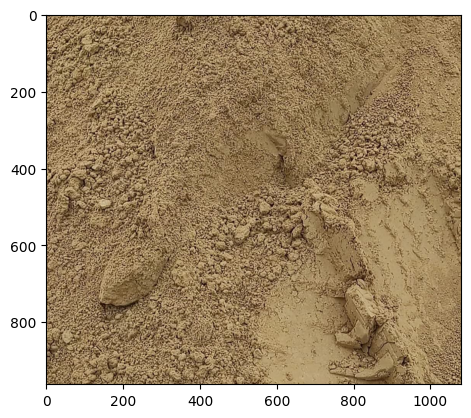

In [ ]:
# Take one image to visualize it's changes after every layer
import keras.utils as image
import numpy as np
img1 = image.load_img('/content/drive/MyDrive/Soil/SoilDataset/Train/Alluvial/Alluvial_2.jpg')
plt.imshow(img1);

#preprocess Image
img1 =image.load_img('/content/drive/MyDrive/Soil/SoilDataset/Train/Alluvial/Alluvial_2.jpg', target_size=(256,256))
img = image.img_to_array(img1)
img=img/255
imge=np.expand_dims(img, axis=0)

In [ ]:
from keras.models import Model
import keras.utils as image
import numpy as np

# First Convolutional Layer
conv2d_output = Model(inputs=model.input, outputs=model.get_layer('conv2d').output)
max_pooling2d_output = Model(inputs=model.input, outputs=model.get_layer('max_pooling2d').output)

# Second Convolutional Layer
conv2d_1_output = Model(inputs=model.input, outputs=model.get_layer('conv2d_1').output)
max_pooling2d_1_output = Model(inputs=model.input, outputs=model.get_layer('max_pooling2d_1').output)

# Third Convolutional Layer
conv2d_2_output = Model(inputs=model.input, outputs=model.get_layer('conv2d_2').output)
max_pooling2d_2_output = Model(inputs=model.input, outputs=model.get_layer('max_pooling2d_2').output)

# Flatten
flatten_output = Model(inputs=model.input, outputs=model.get_layer('flatten').output)

# Load and preprocess image
img_path = '/content/drive/MyDrive/Soil/SoilDataset/Train/Alluvial/Alluvial_2.jpg'
img1 = image.load_img(img_path, target_size=(256, 256))
img = image.img_to_array(img1)
img = img / 255.0
img = np.expand_dims(img, axis=0)

# Ensure the image has the correct shape
img = np.repeat(img, 32, axis=0)

conv2d_features = conv2d_output.predict(img)
max_pooling2d_features = max_pooling2d_output.predict(img)
conv2d_1_features = conv2d_1_output.predict(img)
max_pooling2d_1_features = max_pooling2d_1_output.predict(img)
conv2d_2_features = conv2d_2_output.predict(img)
max_pooling2d_2_features = max_pooling2d_2_output.predict(img)
flatten_features = flatten_output.predict(img)


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 1s 1s/step


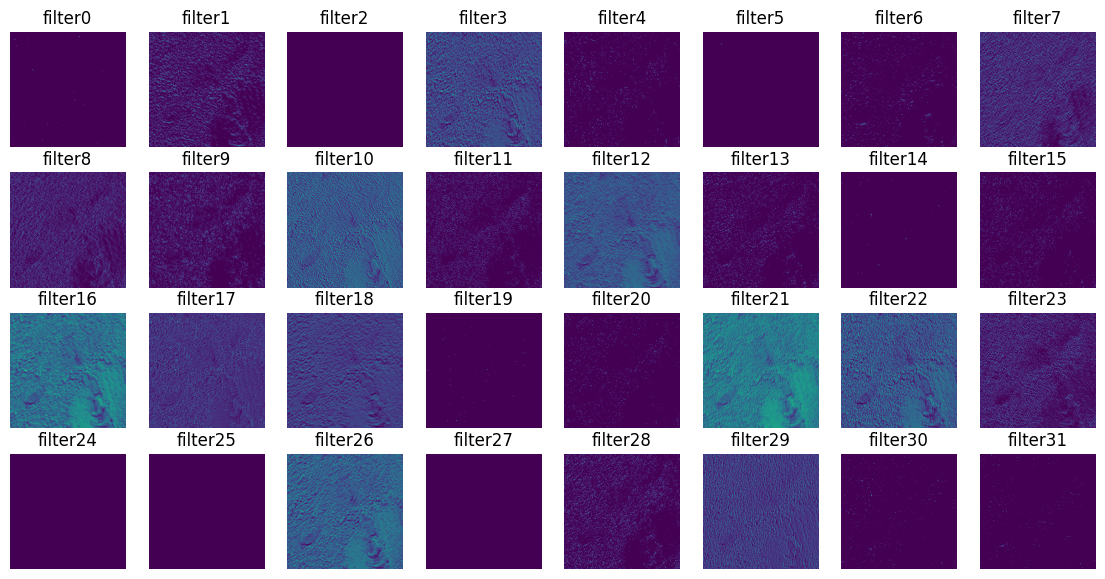

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(14, 7))
columns = 8
rows = 4
for i in range(columns * rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter' + str(i))
    plt.imshow(conv2d_features[0, :, :, i], cmap='viridis')
plt.show()


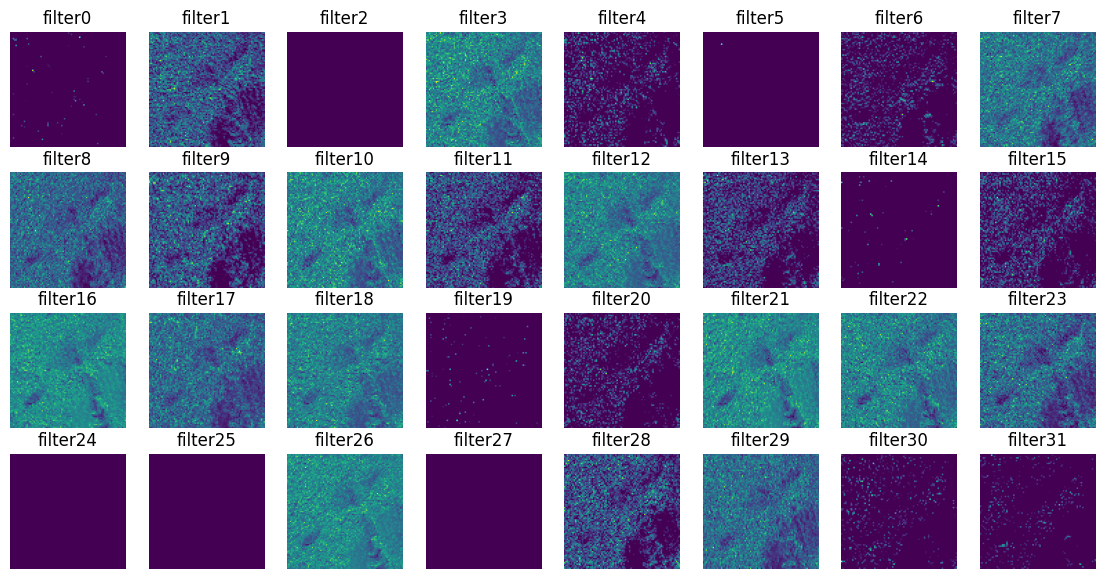

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(14, 7))
columns = 8
rows = 4
for i in range(columns * rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter' + str(i))
    plt.imshow(max_pooling2d_features[0, :, :, i], cmap='viridis')
plt.show()


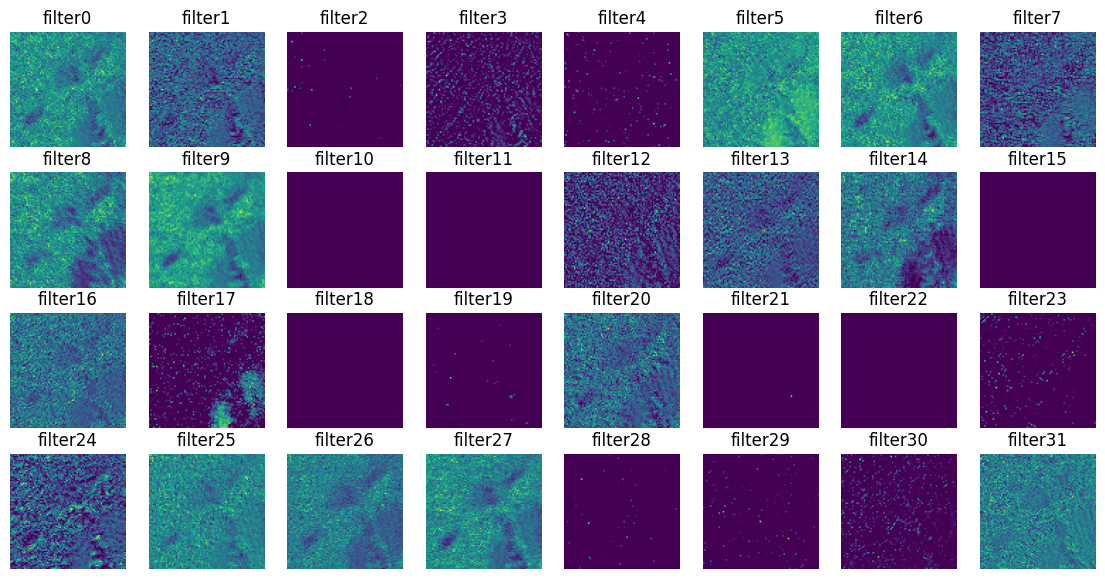

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(14, 7))
columns = 8
rows = 4
for i in range(columns * rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter' + str(i))
    plt.imshow(conv2d_1_features[0, :, :, i], cmap='viridis')
plt.show()


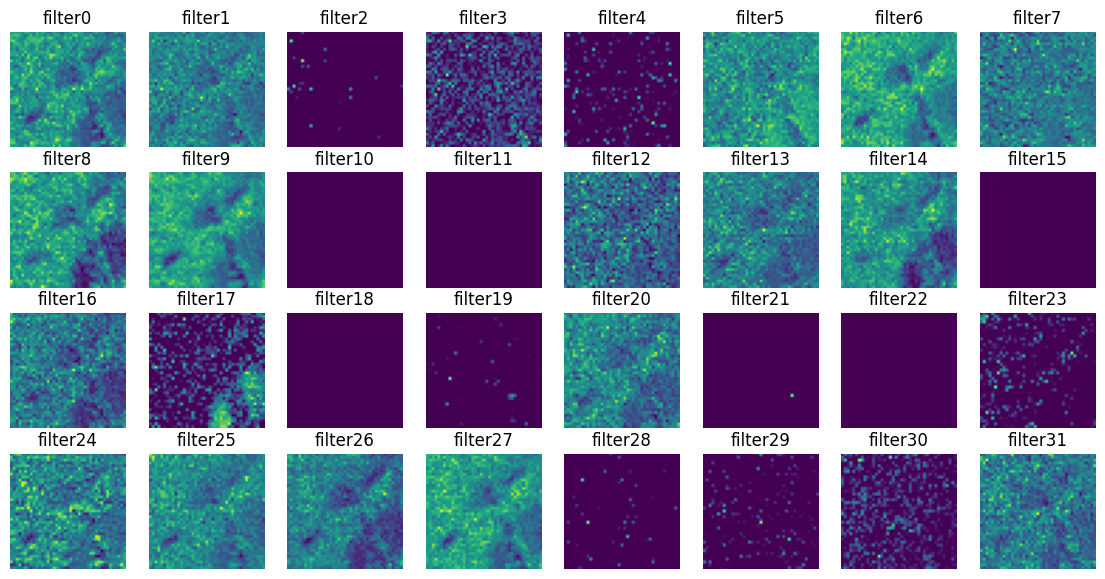

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(14, 7))
columns = 8
rows = 4
for i in range(columns * rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter' + str(i))
    plt.imshow(max_pooling2d_1_features[0, :, :, i], cmap='viridis')
plt.show()

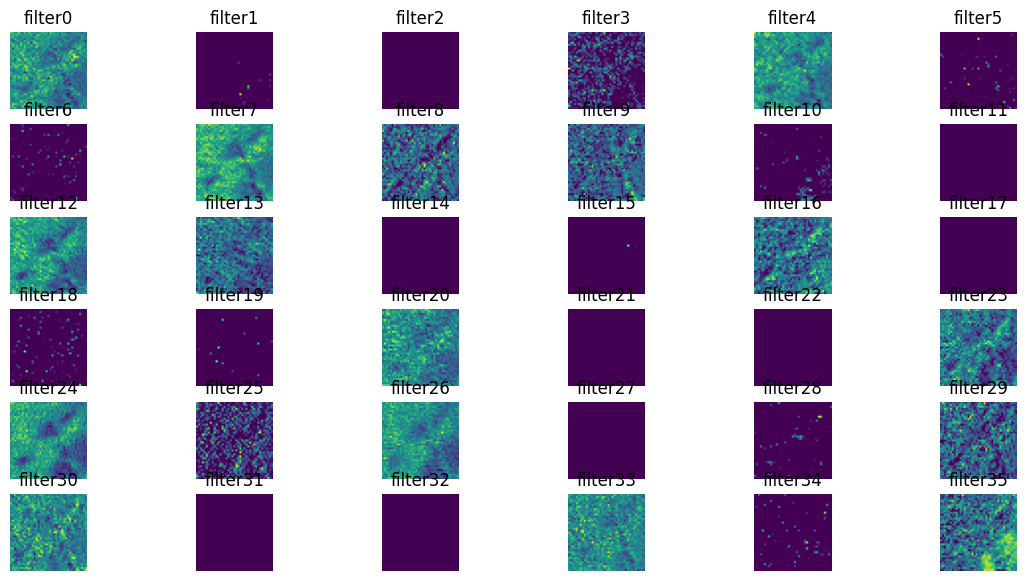

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(14, 7))
columns = 6
rows = 6
for i in range(columns * rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter' + str(i))
    plt.imshow(conv2d_2_features[0, :, :, i], cmap='viridis')
plt.show()


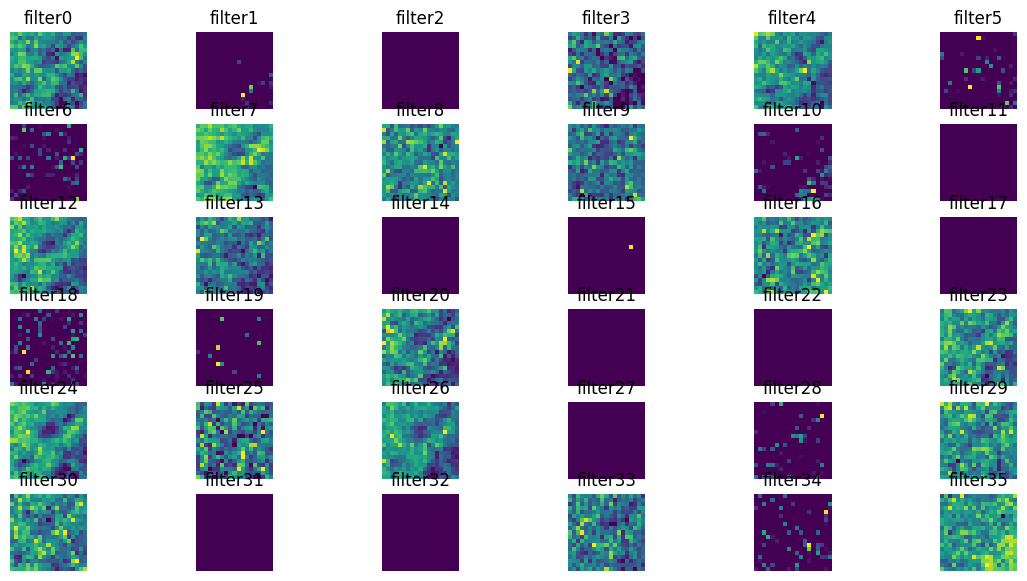

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(14, 7))
columns = 6
rows = 6
for i in range(columns * rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter' + str(i))
    plt.imshow(max_pooling2d_2_features[0, :, :, i], cmap='viridis')
plt.show()


In [ ]:
# validation data
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size)

Found 695 images belonging to 5 classes.


In [ ]:
#model building to get trained with parameters
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

train=model.fit_generator(train_generator,
                          epochs=20,
                          steps_per_epoch=train_generator.samples // batch_size, verbose=1)

Epoch 1/20
21/21 [==============================] - 158s 7s/step - loss: 1.4534 - accuracy: 0.3937
Epoch 2/20
21/21 [==============================] - 80s 4s/step - loss: 1.0004 - accuracy: 0.5988
Epoch 3/20
21/21 [==============================] - 81s 4s/step - loss: 0.8673 - accuracy: 0.6414
Epoch 4/20
21/21 [==============================] - 77s 4s/step - loss: 0.8613 - accuracy: 0.6365
Epoch 5/20
21/21 [==============================] - 77s 4s/step - loss: 0.7965 - accuracy: 0.6561
Epoch 6/20
21/21 [==============================] - 87s 4s/step - loss: 0.8192 - accuracy: 0.6712
Epoch 7/20
21/21 [==============================] - 95s 4s/step - loss: 0.8057 - accuracy: 0.6787
Epoch 8/20
21/21 [==============================] - 83s 4s/step - loss: 0.7421 - accuracy: 0.6983
Epoch 9/20
21/21 [==============================] - 80s 4s/step - loss: 0.7739 - accuracy: 0.6833
Epoch 10/20
21/21 [==============================] - 81s 4s/step - loss: 0.7689 - accuracy: 0.7104
Epoch 11/20
21/21 

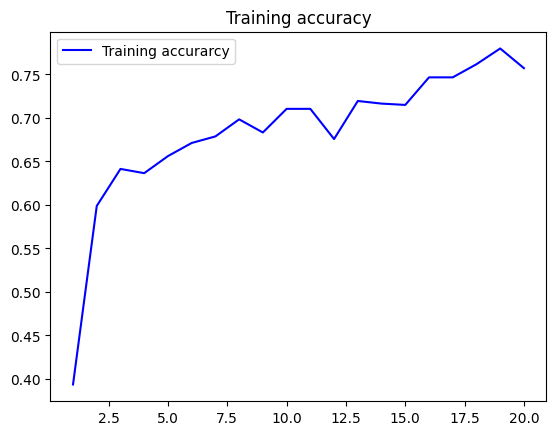

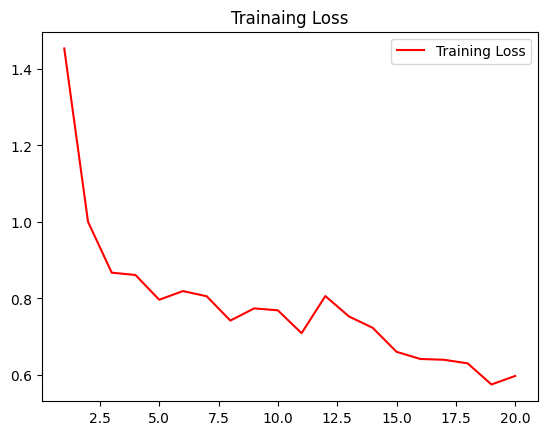

In [ ]:
acc = train.history['accuracy']

loss = train.history['loss']
epochs =range(1, len(acc)+ 1)
#Train accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')

plt.title("Training accuracy")
plt.legend()

plt.figure()

#Train Loss
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.title('Trainaing Loss')
plt.legend()
plt.show()

In [ ]:
# Get training accuracy
train_loss, train_accuracy = model.evaluate_generator(train_generator)
print('Training Accuracy:', train_accuracy)


Training Accuracy: 0.7741007208824158


In [ ]:
# Get testing accuracy
test_loss, test_accuracy = model.evaluate_generator(test_generator)
print('Testing Accuracy:', test_accuracy)

Testing Accuracy: 0.75


In [ ]:
from keras.models import load_model
model.save('SoilModel.h5')

In [ ]:
from keras.models import load_model
model.save_weights('SoilType_weights.h5')